In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [59]:
companies=pd.read_csv("Fortune_1000.csv")


In [60]:
companies.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468


In [61]:
columnstoremove=["company","rank","rank_change","num. of employees", "sector", "city", "newcomer", "ceo_founder", "ceo_woman", "profitable","prev_rank","CEO","Website","Ticker"]

In [62]:
df = pd.DataFrame(companies)
companies=df.drop(columns=columnstoremove)

<ipython-input-63-12caec5e304d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

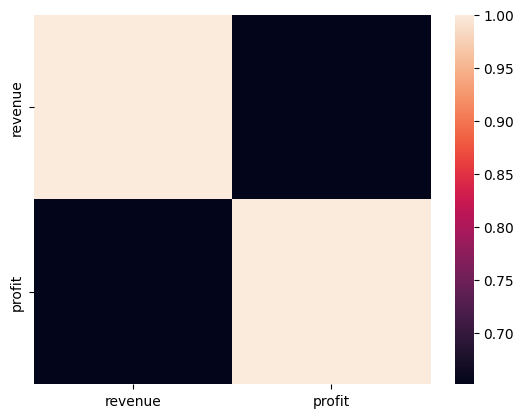

In [63]:
sns.heatmap(companies.corr())

In [69]:
companies=df.dropna()
X= companies.iloc[:,:-1].values
y= companies.iloc[:,3].values

In [70]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
X[:,2]=labelencoder.fit_transform(X[:,2])
onehotencoder= OneHotEncoder()
X=onehotencoder.fit_transform(X).toarray()
print(X[0])


[0. 0. 0. ... 0. 0. 0.]


In [71]:
#avoid dummy
X=X[:,1:]

In [72]:
from pandas.core.common import random_state
#split data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)



In [73]:
#linear
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
y_pred=regressor.predict(X_test)
print(y_pred)

[ 1.83786472e+03 -7.14805453e+03  2.42649171e+04  1.93355979e+04
  5.91319713e+03  1.87498554e+03 -9.67090740e+02  4.36660600e+03
  6.37053073e+04  5.94007893e+04  5.45535391e+03  9.03138139e+03
  1.56004944e+04  9.01099991e+03  3.30436889e+04  3.70039162e+04
 -7.80755136e+03  2.28143391e+04  1.66411388e+03  2.04244791e+04
  4.12584914e+03  2.83566477e+04  2.07158274e+03  5.00530256e+03
  2.60892896e+04  4.14908029e+02  2.66079865e+04  2.34887532e+04
  2.07784221e+04  1.43121833e+03  1.29744079e+03 -1.78524520e+03
 -2.98357703e+03  7.08675236e+03  2.02943037e+04 -9.15355882e+02
  2.50685116e+04  2.19408823e+04  4.64757427e+04  4.64725420e+03
  4.67074854e+04  2.47133268e+03  4.49569658e+04  2.09811372e+04
  4.92867072e+04  1.77572814e+04  2.63807722e+04  2.32207043e+04
  2.31263553e+04  4.66962620e+03  1.51289990e+04  6.04804674e+03
  4.72747189e+03  2.42998959e+04  1.82577303e+04  1.47598237e+04
  7.00261538e+03  2.30560362e+04  5.23467177e+03  2.58370283e+04
  2.39108108e+04 -3.17066

In [77]:
print(regressor.coef_)


[-2590.30252862  2372.05189759  5271.97519797 ...  -168.13802672
  -119.63422957     0.        ]


In [79]:
print(regressor.intercept_)

27952.358825178984
